# Simulador de Lanzamiento de Dados

In [19]:
import random as rd
import matplotlib.pyplot as plt
import numpy as np

import sys

sys.path.append("../src")

from simulador import Simulador

In [20]:
caras_dado = 6
nLanzamientos = 1000
nDados = 3

In [21]:
Simulador.dados(caras_dado, nDados)
lanzamintos = Simulador.lanzamientos(nLanzamientos)

In [22]:
def dato(ndado, caras, resultados):
    frecuencias = {}
    for cara, resultado in zip(caras, resultados):
        frecuencias[int(cara)] = int(resultado)
    return {f"dado_{ndado}": frecuencias}

In [23]:
def frecuencia_absoluta(nDados, lanzamintos):
    resultados = {}
    for i in range(nDados):
        cara_dado, frecuencias_cara = np.unique(lanzamintos[:, i], return_counts=True)
        resultados[f"dado_{i+1}"] = frecuencias_cara
    return resultados

In [24]:
# frecuencia absoluta
frecuencia = frecuencia_absoluta(nDados, lanzamintos)
frecuencia

{'dado_1': array([149, 183, 182, 164, 156, 166]),
 'dado_2': array([168, 139, 181, 162, 172, 178]),
 'dado_3': array([167, 157, 167, 169, 166, 174])}

In [25]:
# frecuencia relativa
def frecuencia_relativa_dado(nLanzamientos, frecuencia):
    resultados = {}
    for dado, frecuencias in frecuencia.items():
        resultados[dado] = frecuencias / nLanzamientos
    return resultados


frecuencia_relativa_dado(nLanzamientos, frecuencia)

{'dado_1': array([0.149, 0.183, 0.182, 0.164, 0.156, 0.166]),
 'dado_2': array([0.168, 0.139, 0.181, 0.162, 0.172, 0.178]),
 'dado_3': array([0.167, 0.157, 0.167, 0.169, 0.166, 0.174])}

In [26]:
def imprimir_resultados(probabilidad):
    for suma, p in probabilidad.items():
        print(f"Suma {suma}: {p:.4f}")

In [27]:
import itertools
from collections import Counter


# frecuencia relativa teorica
def probabilidad_teorica(caras_dado=6, nDados=1):
    combinaciones = itertools.product(range(1, caras_dado + 1), repeat=nDados)
    sumas = (sum(comb) for comb in combinaciones)
    conteo = Counter(sumas)
    total_combinaciones = caras_dado**nDados
    probabilidad = {suma: conteo[suma] / total_combinaciones for suma in sorted(conteo)}
    return probabilidad

In [28]:
# frecuen relativa real
def frecuencia_relativa(lanzamintos):
    sumas = (sum(comb) for comb in lanzamintos)
    conteo = Counter(sumas)
    total_combinaciones = len(lanzamintos)
    probabilidad = {suma: conteo[suma] / total_combinaciones for suma in sorted(conteo)}
    return probabilidad

## Funcion crear tabgrafica

In [ ]:
import matplotlib.pyplot as plt


def crear_grafica(prob_teorica, prob_simulada, tiradas, nDados, caras_dado):
    path = f"../results/Grafico_barras_{tiradas}.png"
    x = list(prob_teorica.keys())
    ancho = 0.4
    plt.figure(figsize=(10, 6))
    plt.bar(np.array(x) - ancho / 2, prob_teorica.values(), ancho, label="Teórica")
    plt.bar(
        np.array(x) + ancho / 2,
        list(prob_simulada.get(i, 0) for i in x),
        ancho,
        label="Simulada",
    )
    plt.xlabel("Suma")
    plt.ylabel("Probabilidad")
    plt.title(
        f"Comparación de Probabilidades Teóricas y Simuladas de {tiradas} tiradas de {nDados} dados de {caras_dado} caras cada"
    )
    plt.legend()
    plt.savefig(path)
    plt.show()
    plt.close()  # Cierra la figura para liberar memoria

# frecuancia teorica

In [30]:
prob_teorica = probabilidad_teorica(caras_dado, nDados)
imprimir_resultados(prob_teorica)

Suma 3: 0.0046
Suma 4: 0.0139
Suma 5: 0.0278
Suma 6: 0.0463
Suma 7: 0.0694
Suma 8: 0.0972
Suma 9: 0.1157
Suma 10: 0.1250
Suma 11: 0.1250
Suma 12: 0.1157
Suma 13: 0.0972
Suma 14: 0.0694
Suma 15: 0.0463
Suma 16: 0.0278
Suma 17: 0.0139
Suma 18: 0.0046


## prueba con 10 lanzamiento

In [31]:
Simulador.dados(caras_dado, nDados)
tiradas = 10
lanzamintos = Simulador.lanzamientos(tiradas)
fr10 = frecuencia_relativa(lanzamintos)
imprimir_resultados(fr10)

Suma 3: 0.1000
Suma 4: 0.2000
Suma 8: 0.1000
Suma 9: 0.2000
Suma 11: 0.1000
Suma 12: 0.2000
Suma 14: 0.1000


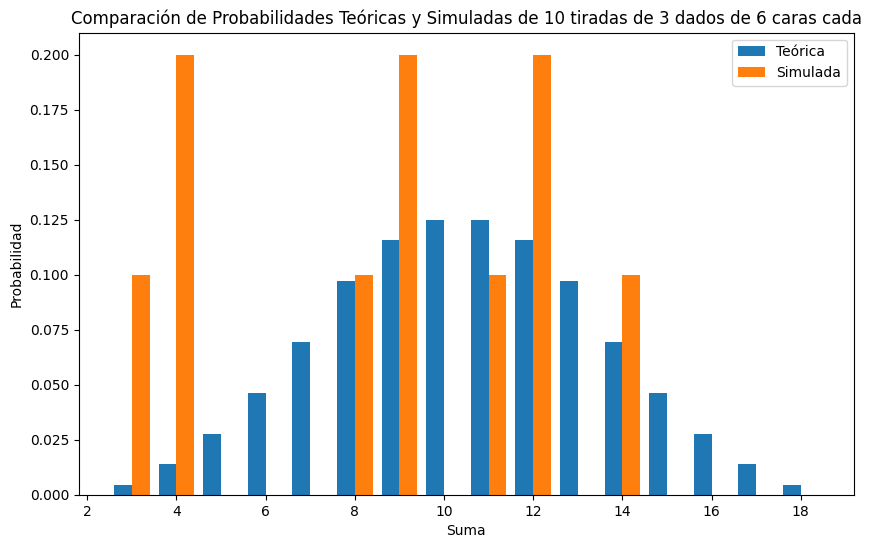

In [32]:
crear_grafica(prob_teorica, fr10, tiradas, nDados, caras_dado)

## prueba con 100 lanzamiento

In [33]:
Simulador.dados(caras_dado, nDados)
tiradas = 100
lanzamintos = Simulador.lanzamientos(tiradas)
fr100 = frecuencia_relativa(lanzamintos)
imprimir_resultados(fr100)

Suma 4: 0.0100
Suma 5: 0.0300
Suma 6: 0.0900
Suma 7: 0.0500
Suma 8: 0.0800
Suma 9: 0.1100
Suma 10: 0.1000
Suma 11: 0.1000
Suma 12: 0.1500
Suma 13: 0.1100
Suma 14: 0.1100
Suma 15: 0.0400
Suma 16: 0.0100
Suma 17: 0.0100


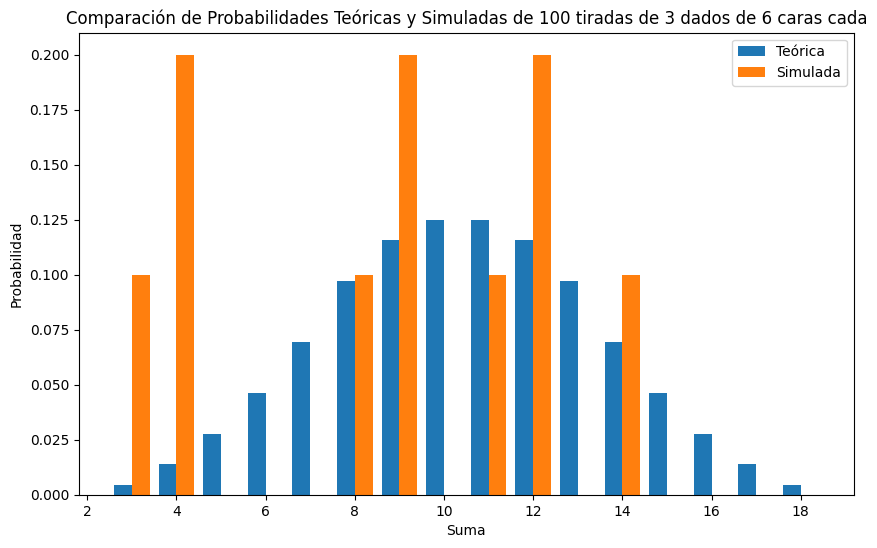

In [34]:
crear_grafica(prob_teorica, fr10, tiradas, nDados, caras_dado)

## prueba con 1000000 lanzamiento

In [35]:
Simulador.dados(caras_dado, nDados)
tiradas = 1000000
lanzamintos = Simulador.lanzamientos(tiradas)
fr1000000 = frecuencia_relativa(lanzamintos)
imprimir_resultados(fr1000000)

Suma 3: 0.0046
Suma 4: 0.0140
Suma 5: 0.0277
Suma 6: 0.0467
Suma 7: 0.0693
Suma 8: 0.0972
Suma 9: 0.1158
Suma 10: 0.1255
Suma 11: 0.1245
Suma 12: 0.1157
Suma 13: 0.0973
Suma 14: 0.0690
Suma 15: 0.0465
Suma 16: 0.0278
Suma 17: 0.0138
Suma 18: 0.0045


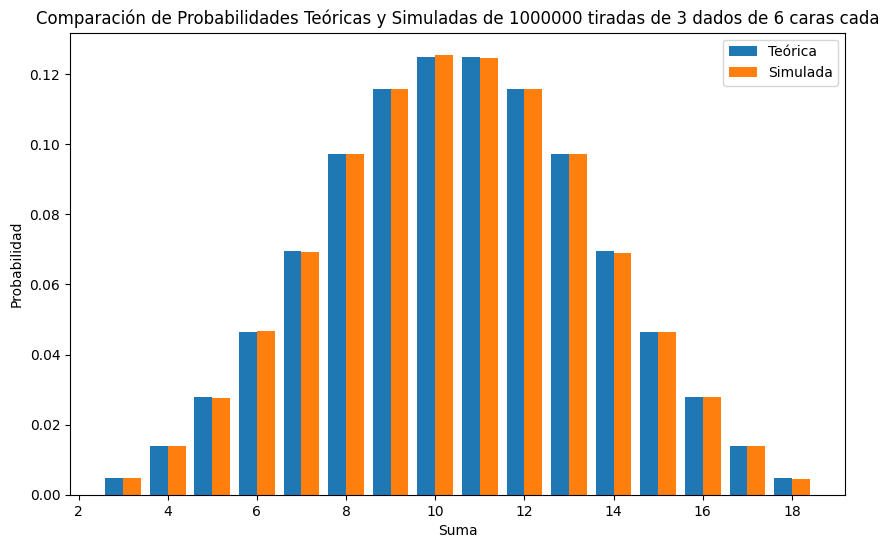

In [36]:
crear_grafica(prob_teorica, fr1000000, tiradas, nDados, caras_dado)